In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

# Adjust the path to point to your project root.
project_root = os.path.abspath('/Users/treycole/Repos/axion-pert')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from modules.qe_read_file import *

In [3]:
output_folder = "110723bc889"
mat = "MnBi2Te4"
prefix = f"/Users/treycole/Repos/axion-pert/qe_calcs/{mat}/wo_soc/output/{output_folder}"

In [4]:
kpts, bands = read_bands_gnu(f"{prefix}/{mat}.bandsx.out.gnu")
dos_energy, dos = read_dos(f"{prefix}/{mat}.pdos_tot")

In [5]:
dos_energy_Mn1_s1, dos_Mn1_s1 = read_dos(f"{prefix}/{mat}.pdos_atm#1(Mn1)_wfc#1(s)")
dos_energy_Mn1_s2, dos_Mn1_s2 = read_dos(f"{prefix}/{mat}.pdos_atm#1(Mn1)_wfc#2(s)")
dos_energy_Mn1_p, dos_Mn1_p = read_dos(f"{prefix}/{mat}.pdos_atm#1(Mn1)_wfc#3(p)")
dos_energy_Mn1_d, dos_Mn1_d = read_dos(f"{prefix}/{mat}.pdos_atm#1(Mn1)_wfc#4(d)")

dos_energy_Mn2_s1, dos_Mn2_s1 = read_dos(f"{prefix}/{mat}.pdos_atm#2(Mn2)_wfc#1(s)")
dos_energy_Mn2_s2, dos_Mn2_s2 = read_dos(f"{prefix}/{mat}.pdos_atm#2(Mn2)_wfc#2(s)")
dos_energy_Mn2_p, dos_Mn2_p = read_dos(f"{prefix}/{mat}.pdos_atm#2(Mn2)_wfc#3(p)")
dos_energy_Mn2_d, dos_Mn2_d = read_dos(f"{prefix}/{mat}.pdos_atm#2(Mn2)_wfc#4(d)")

pdos_Bi = {}
# Read the Bi DOS files
for i in range(3, 7):
    dos_energy_s, dos_s = read_dos(f"{prefix}/{mat}.pdos_atm#{i}(Bi)_wfc#1(s)")
    dos_energy_p, dos_p = read_dos(f"{prefix}/{mat}.pdos_atm#{i}(Bi)_wfc#2(p)")
    dos_energy_d, dos_d = read_dos(f"{prefix}/{mat}.pdos_atm#{i}(Bi)_wfc#3(d)")

    pdos_Bi[(i, 's')] = (dos_energy_s, dos_s)
    pdos_Bi[(i, 'p')] = (dos_energy_p, dos_p)
    pdos_Bi[(i, 'd')] = (dos_energy_d, dos_d)

pdos_Te = {}
# Read the Te DOS files
for i in range(7, 15):
    dos_energy_s, dos_s = read_dos(f"{prefix}/{mat}.pdos_atm#{i}(Te)_wfc#1(s)")
    dos_energy_p, dos_p = read_dos(f"{prefix}/{mat}.pdos_atm#{i}(Te)_wfc#2(p)")

    pdos_Te[(i, 's')] = (dos_energy_s, dos_s)
    pdos_Te[(i, 'p')] = (dos_energy_p, dos_p)

Bi_s_dos = np.sum([dos[1] for key, dos in pdos_Bi.items() if key[1] == 's'], axis=0)
Bi_p_dos = np.sum([dos[1] for key, dos in pdos_Bi.items() if key[1] == 'p'], axis=0)
Bi_d_dos = np.sum([dos[1] for key, dos in pdos_Bi.items() if key[1] == 'd'], axis=0)
Te_s_dos = np.sum([dos[1] for key, dos in pdos_Te.items() if key[1] == 's'], axis=0)
Te_p_dos = np.sum([dos[1] for key, dos in pdos_Te.items() if key[1] == 'p'], axis=0)

In [6]:
E_F = 7.6465 # eV

In [7]:
bands.shape

(200, 151)

In [8]:
bands[(bands > 0) & (bands < 7.8)].shape[0] / 151

29.0

In [9]:
kpts.shape

(151,)

In [10]:
kpts[52]- kpts[53]

-0.07310000000000016

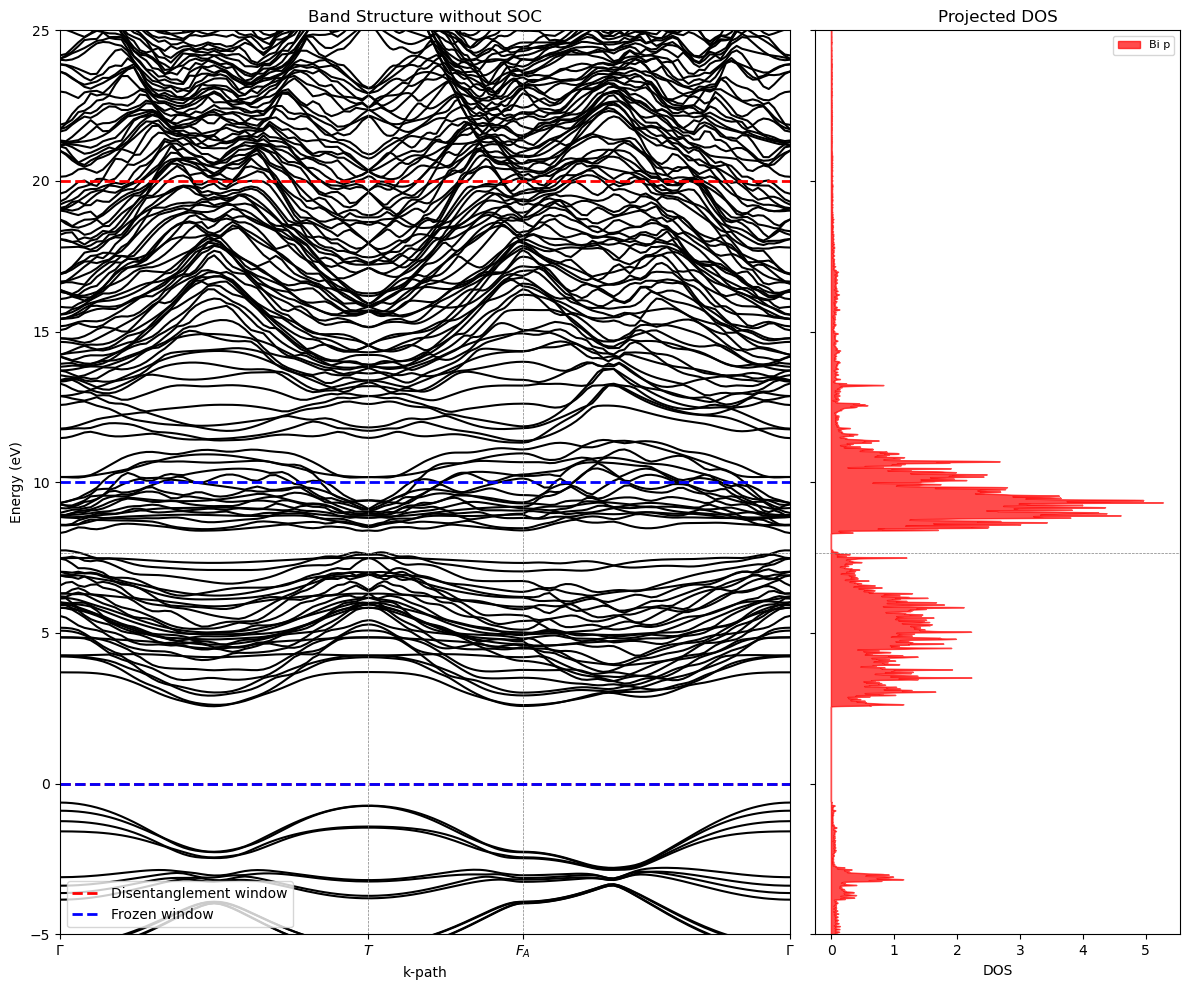

In [12]:
dos_scale = 0.5
fig, ax = plt.subplots(1, 2, figsize=(12, 10), gridspec_kw={'width_ratios': [2, 1]}, sharey=True)

# Plot bands
for band in bands:
    ax[0].plot(kpts, band, color='black')

ax[0].set_xlabel('k-path')
ax[0].set_ylabel('Energy (eV)')
ax[0].set_title('Band Structure without SOC')
ax[0].axhline(E_F, linestyle='--', color='gray', lw=0.5)

segments = [50, 50, 50, 1]  # Number of points per segment
labels = [r'$\Gamma$', r'$T$', r'$F_A$', r'$\Gamma$']
xticks, xlabels = get_symmetry_kpath_labels(kpts, segments, labels)

ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xlabels)
for x in xticks:
    ax[0].axvline(x, color='gray', lw=0.5, ls='--')

# Plot DOS
dos_energy_Bi_s1, _ = pdos_Bi[(3, 's')]
dos_energy_Bi_p1, _ = pdos_Bi[(3, 'p')]
dos_energy_Bi_d1, _ = pdos_Bi[(3, 'd')]
dos_energy_Te_s1, _ = pdos_Te[(7, 's')]
dos_energy_Te_p1, _ = pdos_Te[(7, 'p')]

# Trial wfs
ax[1].fill_betweenx(dos_energy_Bi_p1, Bi_p_dos, color='red', label = 'Bi p', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Te_p1, Te_p_dos, color='blue', label = 'Te p', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Mn1_d, dos_Mn1_d, color='green', label='Mn1 d', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Mn2_d, dos_Mn2_d, color='yellow', label='Mn2 d', alpha=0.7)

# ax[1].fill_betweenx(dos_energy, dos, color='red', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Bi_s1, Bi_s_dos, color='orange', label = 'Bi s', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Bi_d1, Bi_d_dos, color='yellow', label = 'Bi d', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Te_s1, Te_s_dos, color='indigo', label = 'Te s', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Mn1_s1, dos_Mn1_s1, color='purple', label='Mn1 s1', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Mn1_s2, dos_Mn1_s2, color='purple', label='Mn1 s2', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Mn1_p, dos_Mn1_p, color='pink', label='Mn1 p', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Mn2_s1, dos_Mn2_s1, color='purple', label='Mn2 s1', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Mn2_s2, dos_Mn2_s2, color='purple', label='Mn2 s2', alpha=0.7)
# ax[1].fill_betweenx(dos_energy_Mn2_p, dos_Mn2_p, color='pink', label='Mn2 p', alpha=0.7)
ax[1].set_xlabel('DOS')
ax[1].set_title('Projected DOS')
ax[1].axhline(E_F, linestyle='--', color='gray', lw=0.5)

# Wan90
dis_win = [0, 20]
froz_win = [0, 10]

ax[0].axhline(dis_win[0], linestyle='--', color='r', lw=2, label='Disentanglement window')
ax[0].axhline(dis_win[1], linestyle='--', color='r', lw=2)
ax[0].axhline(froz_win[0], linestyle='--', color='b', lw=2, label='Frozen window')
ax[0].axhline(froz_win[1], linestyle='--', color='b', lw=2 )
ax[0].legend()

ax[0].set_xlim(kpts[0], kpts[-1])
# ax[0].set_ylim(-80, 32)

# ax[0].set_ylim(E_F-0.1, E_F+0.2)
ax[0].set_ylim(dis_win[0]-5, dis_win[1] + 5)
# ax[1].set_xlim(0, 1)

plt.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

### Wannier windows

- Distentanglement: -7-15 eV
- Frozen: 2.5-11 eV

### Trial wavefunctions
Number of bands from -7-15 eV = 75

Number of bands from 2.5-11 eV ~ 46 (less at some k-points)

- Mn1 d: 5 (l orbs) x 1 (atoms) x 2 (spins) = 10
- Mn2 d: 5 (l orbs) x 1 (atoms) x 2 (spins) = 10
- Bi p: 3 (l orbs) x 4 (atoms) x 2 (spins) = 24
- Te p: 3 (l orbs) x 8 (atoms) x 2 (spins) = 48

Total number of trial states = 92 (/2 = 46)


- Mn1 s2: 1 (l orbs) x 1 (atoms) x 2 (spins) = 2
- Mn2 s2: 1 (l orbs) x 1 (atoms) x 2 (spins) = 2
- Bi s: 1 (l orbs) x 4 (atoms) x 2 (spins) = 8
- Te s: 1 (l orbs) x 8 (atoms) x 2 (spins) = 16

Total number of states = 120

To include some additional conduction states we could consider 150-200 bands


Try with no smearing